# **Análisis exploratorio y estadística**

# AE11 - Proyecto - Reconstrucción análisis 538 - Fandango

## <font color='blue'>**Contexto**</font>

__[FiveThirtyEight](https://fivethirtyeight.com/)__, a veces representado como __538__, es un sitio web estadounidense que se centra en el análisis de encuestas de opinión, la política, la economía y los blogs deportivos.

En octubre de 2015, publico un análisis que tituló "Be Suspicious Of Online Movie Ratings, Especially Fandango’s" (Sospeche de las clasificaciones de películas en línea, especialmente de Fandango), en el cual analizaba y cuestionaba el hecho que __la misma empresa__ (Fandango) tenía un __conflicto de interés__ al __publicar las calificaciones__ de las películas y __vender entradas__ al mismo tiempo.

## <font color='blue'>**Preguntas de investigación**</font>
1. ¿Tienen Fandango alguna predisposición a calificar las películas por encima de lo que deberían calificar?
2. ¿Hay evidencias de conflicto de interés en un sitio web que nos entrega las calificaciones de laspelículas y que, además, nos vende entradas?


## <font color='blue'>**Misión**</font> 
Su objetivo es completar las actividades a continuación basándose en el artículo __538__ mencionado, y ver si llega a una conclusión similar. Utilice los conocimientos adquiridos (`Pandas`, `Numpy`,`Malplotlib`, visualización y estadísticas) para determinar si las calificaciones de Fandango en 2015 tenían un sesgo hacia calificar mejor las películas para vender más boletos. 

## <font color='green'>**Actividad 1**</font>
### Investigación de los antecedentes y los datos


1. Lea el artículo: [Sospeche de las calificaciones de películas en línea, especialmente las de Fandango](http://fivethirtyeight.com/features/fandango-movies-ratings/)
2. Lea los datasets del estudio. Hay dos archivos csv, uno con las calificaciones de Fandango (`fandango_scrape.csv`), y el otro con datos agregados para clasificaciones de películas de otros sitios, como Metacritic, IMDB y Rotten Tomatoes (`all_sites_scores.csv`). Los datos de Fandango se extrajeron el 24 de agosto de 2015, y contienen al menos 3o valoraciones de usuarios por película.
3. Explore las características de ambos datasets.

__Descripción de all_sites_scores.csv__

Columna | Contenido
--- | -----------
FILM | La película analizada
RottenTomatoes | Rotten Tomatoes Tomatometer valoración para la película
RottenTomatoes_User | Rotten Tomatoes valoración de usuario para la película
Metacritic | Metacritic valoración para la película
Metacritic_User | Metacritic valoración de usuario para la película
IMDB | IMDb valoración de usuario para la película
Metacritic_user_vote_count | Número de votos de usuario que tuvo la película en Metacritic
IMDB_user_vote_count | Número de votos de usuario que tuvo la película en IMDb


__Descripcioón de fandango_scrape.csv__

Contiene todas las películas analizadas por el sitio __538__..

Columna | Contenido
--- | ---------
FILM | La película analizada
STARS | Valoración en estrellas presentada en Fandango.com
RATING |El valor de calificación de Fandango para la película, extraído del HTML de cada página. Esta es la puntuación media real que obtuvo la película.
VOTES | Cantidad de personas que habían revisado la película en el momento en que la sacamos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

sns.set(context='notebook',
        style={'axes.facecolor': '#eaeaff',
               'figure.facecolor': '#eaeaff',
               'axes.edgecolor': '#0F0F0F',
               'text.color': 'navy',
               'xtick.color': 'navy',
               'ytick.color': 'navy',
               'grid.color': '#eaeaff'
               },
        palette=['crimson', 'darkcyan', 'slateblue', 'orangered'])

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/"

scores_df = pd.read_csv(path+"all_sites_scores.csv")
fandango_df = pd.read_csv(path+"fandango_scrape.csv")

scores_df.sample(5)

Mounted at /content/drive


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
60,Unfinished Business (2015),11,27,32,3.8,5.4,39,14346
127,The Last Five Years (2015),60,60,60,6.9,6.0,20,4110
75,San Andreas (2015),50,58,43,5.5,6.5,199,45723
120,The Wolfpack (2015),84,73,75,7.0,7.1,8,1488
112,It Follows (2015),96,65,83,7.5,6.9,551,64656


In [3]:
scores_df.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [4]:
fandango_df.sample(5)

,FILM,STARS,RATING,VOTES
271,Grandma (2015),4.0,3.9,14
134,David and Goliath (2015),3.5,3.2,123
330,Soaked In Bleach (2015),5.0,5.0,6
338,Humpback Whales 3D (2015),4.0,3.8,5
421,A Hard Day (2015),5.0,5.0,1


In [5]:
fandango_df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<font color="orangered">Para la plataforma rotten tomatoes, la valoración promedio entre la plataforma y sus usuarios es muy similar (60.85 versus 63.88), mientras que para metacritic se puede deducir que la escala de usuarios es distinta a plataforma, ya que la plataforma tiene una valoración promedio de 58.81, mientras que de los usuarios es de 6.52. IMBD tiene una valoración promedio de peliculas de 6.74, mientras que los votos promedios de las peliculas es de 42846.  En el caso de fandango, las valoraciones de la plataforma son muy similares, siendo de 3.56, mientras que el rating (usuarios) es de 3.38</font>

<font color='green'>Fin actividad 1</font>

## <font color='green'>**Actividad 2**</font>

### Explorando las valoraciones mostradas en Fandango frente a las puntuaciones reales de los usuarios

Exploremos las calificaciones de Fandango para ver si nuestro análisis está de acuerdo con la conclusión del artículo.

1. Explore la relación entre la popularidad de una película y su calificación. Cree un diagrama de dispersión que muestre la relación entre la calificación y los votos. 
2. Calcule la correlación entre las distintas variables y visualícelas.
3. Calcule cuántas películas hay en Fandango por año y visualice.
4. Cuáles son las 10 películas con más votaciones?
5. Cuántas películas tienen cero votos?
6. Cree un nuevo DataFrame con las películas que tienen al menos un voto



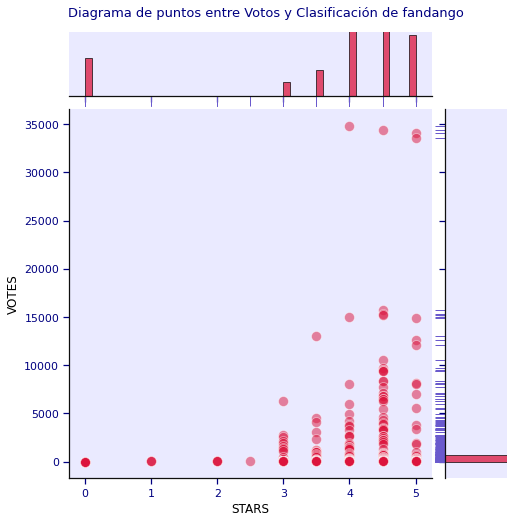

In [6]:
# 1. Relación entre la popularidad de una película y su calificación
g = sns.jointplot(x='STARS', y='VOTES', data=fandango_df, height=7,
                  joint_kws=dict(s=100, legend=None, color='crimson', alpha=0.5),
                  marginal_kws=dict(bins=50, color='crimson'))
g.plot_marginals(sns.rugplot, color="slateblue", height=-.15, clip_on=False)
plt.suptitle('Diagrama de puntos entre Votos y Clasificación de fandango', y=1.03, fontsize=13)
plt.show()

<font color="orangered">Del gráfico podemos deducir que independiente de la calificación de fandango, es muy frecuente para las peliculas tener pocos votos (observar histograma de votos). Además, hay varias películas sin clasificación (STARS=0).</font>

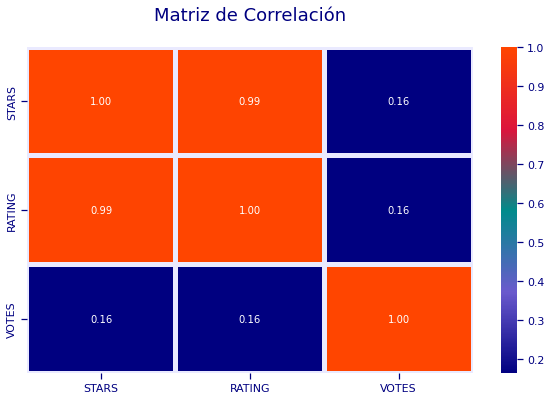

In [7]:
# 2. Correlación entre las distintas variables
corr  = fandango_df._get_numeric_data().corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, linewidths=4, linecolor='#eaeaff', fmt='.2f',
            cmap=mcolors.LinearSegmentedColormap.from_list("", ['navy', 'slateblue', 'darkcyan', 'crimson', 'orangered']))
plt.title('Matriz de Correlación' + '\n', fontsize=18)
plt.show()

<font color="orangered">Rating está relacionada directamente con Stars (corr=0.99)</font>

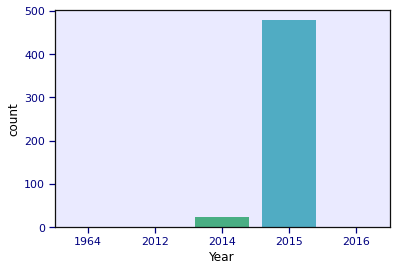

Year
1964      1
2012      1
2014     23
2015    478
2016      1
Name: FILM, dtype: int64

In [8]:
# 3. Creamos una nueva columna con el año incluido en el nombre de las películas
fandango_df["Year"] = fandango_df["FILM"].apply(lambda x: int(x[-5:-1]))

sns.countplot(x='Year', data=fandango_df)
plt.show()

#fandango_df.pivot_table(index=fandango_df["Year"], values=fandango_df["STARS"], aggfunc='count')
fandango_df.groupby(["Year"]).count()['FILM']

<font color="orangered">La plataforma Fandango ha clasificado en su gran mayoría peliculas estrenadas el año 2015, representando el 95% del total de sus films.</font>

In [9]:
# 4. Las 10 películas con más votos
fandango_df.sort_values("VOTES", ascending=False)[:10][["FILM",'VOTES']]

,FILM,VOTES
0,Fifty Shades of Grey (2015),34846
1,Jurassic World (2015),34390
2,American Sniper (2015),34085
3,Furious 7 (2015),33538
4,Inside Out (2015),15749
5,The Hobbit: The Battle of the Five Armies (2014),15337
6,Kingsman: The Secret Service (2015),15205
7,Minions (2015),14998
8,Avengers: Age of Ultron (2015),14846
9,Into the Woods (2014),13055


In [10]:
# 5. Cuántas películas tienen cero votos
print('-'*4,'Films sin votaciones','-'*4)
print(fandango_df[fandango_df["VOTES"]==0].count()[0])
#fandango_df.loc[fandango_df['VOTES']==0].shape[0]
#fandango_df[fandango_df["VOTES"]==0].sample(2)

---- Films sin votaciones ----
69


<font color="orangered">69 films no tienen Votación en la plataforma de fandango.</font>

In [11]:
# 6. Creamos una nuevo DataFrame con las películas con al menos una valoración
fandango_VOTES_df = fandango_df[fandango_df["VOTES"]>0]
#print(fandango_VOTES_df['VOTES'].min())

<font color='green'>Fin actividad 2</font>

## <font color='green'>**Actividad 3**</font>

En un sistema de redondeo normal, un sitio redondearía a la media estrella de valoración más cercana, hacia arriba o hacia abajo. Como se indica en el artículo, el sistema de redondeo de Fandango, y a modo de ejemplo, en el caso de "Ted 2", esperaríamos que la calificación se redondeara a 4 estrellas (dado que la valoración es de usuarios es 4.1). Sin embargo, Fandango redondeó el "ratingValue" hacia arriba, hasta un 4.5. Esto nos demuestra que la calificación real del usuario puede ser ligeramente diferente a la calificación que se le muestra a un usuario en el sitio web. 
Visualice esta diferencia en distribuciones.

1. Verifique con gráficos KDE rellenos si las distribuciones de las calificaciones que se muestran (STARS) son distintas a la calificación real de los votos (RATING). Tip: recorte los KDE a 0-5 con
`clip=[0,5]`

2. Si es que en el punto anterior hay una diferencia, cuantifíquela y añádala en una nueva columna del DataFrame. Esta nueva columna debe quedar expresada con un decimal.

3. Grafique la cantidad de veces que cada diferencia (0.1, 0.2, 0.3, etc.) se produce.

4. ¿Qué película(s) tiene(n) un diferencial de más de media estrella?

In [12]:
import warnings
warnings.filterwarnings("ignore") #ignora advertencias

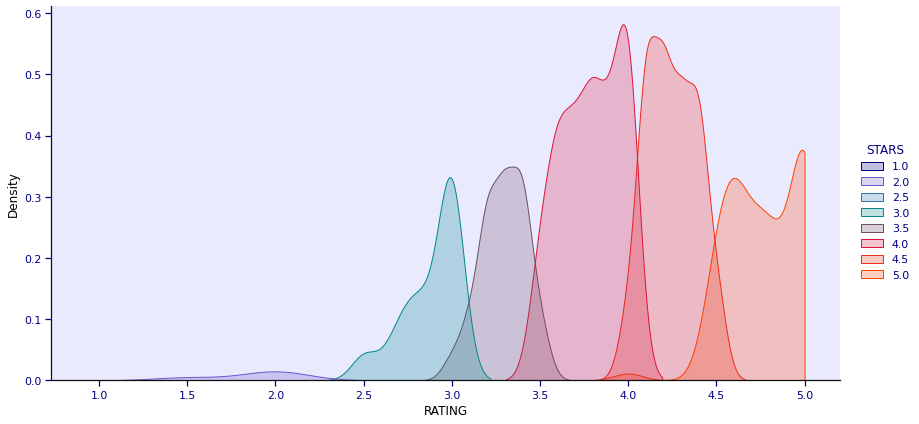

In [13]:
# 1. Comparamos los KDEs
import matplotlib.colors as mcolors
sns.displot(data=fandango_VOTES_df, x="RATING", hue="STARS", kind="kde", clip=[0,5], height=6, aspect=2, fill=True,
            palette=mcolors.LinearSegmentedColormap.from_list("", ['navy', 'slateblue', 'darkcyan', 'crimson', 'orangered']),
            warn_singular=False
            )
plt.show()

<font color="orangered">Las películas con STARS sobre 3, observamos que la densidad del rating está desplazada a la derecha en relación a la cantidad de estrellas del film, es decir, la frecuencia que el rating sea menor a su valoración es muy alta, evidenciando que el sistema de redondeo es por exceso.</font>

In [14]:
# 2. Cuantifiquemos ahora realmente esta discrepancia. 
fandango_VOTES_df['DIFF'] = round(fandango_VOTES_df['STARS'] - fandango_VOTES_df['RATING'],1)
fandango_VOTES_df.sample(5)

,FILM,STARS,RATING,VOTES,Year,DIFF
429,That Guy Dick Miller (2015),5.0,5.0,1,2015,0.0
284,Spring (2015),4.0,3.6,11,2015,0.4
75,Blackhat (2015),3.0,2.8,1430,2015,0.2
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
365,National Theatre Live: The Hard Problem (2015),5.0,5.0,4,2015,0.0


---- Peliculas con diferencia en su calificación ----
328



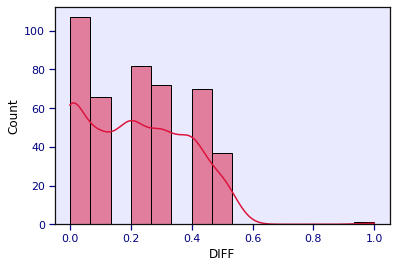

In [15]:
#3. Cantidad de veces que las diferencias se producen.
print('-'*4,'Peliculas con diferencia en su calificación','-'*4)
print(fandango_VOTES_df[fandango_VOTES_df['DIFF'] != 0].count()[0])
print('')

sns.histplot(data=fandango_VOTES_df, x='DIFF', bins=15, kde=True)
plt.show()

<font color="orangered">De las diferencias se observa que en primer lugar son mayores a 0, eso implica que la valoración de fandango es mayor a la de los usuarios en todos los casos.</font>

In [16]:
# 4. Buscamos la pelicula con una diferencia de una estrella
fandango_VOTES_df[fandango_VOTES_df['DIFF'] > 0.5]
#fandango_VOTES_df[fandango_VOTES_df['DIFF'] = 0.5] son 37 casos donde hay una diferencia de 0.5 estrellas

,FILM,STARS,RATING,VOTES,Year,DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


<font color="orangered">La película Turbo Kid tiene una diferencia entre la valoración de fandango y los usuarios de 1 estrella.</font>

<font color='green'>Fin actividad 3</font>

## <font color='green'>**Actividad 4**</font>
## Comparación de las valoraciones de Fandango con Rotten Tomatoes

Compare las valoraciones de Fandango con la de __Rotten Tomatoes__. Analice y comente las diferencias.

1. Analice __Rotten Tomatoes__ (__RT__). Observe cómo el sitio tiene dos valoraciones; una de críticos especializados y otra de usuarios. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. Cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para Rotten Tomatoes. Calcule esto con `RottenTomatoes - RottenTomatoes_User`

3. Calcule la diferencia media absoluta obtenida en el punto 2. Atención con los valores negativos. 

4. Visualice con 2 subplots horizontales:
  * La distribución de las diferencias entre `RT Critics Score` y `RT User Score`. Debe haber valores negativos en esta gráfica de distribución. Utilice KDE e histogramas para mostrar esta distribución.
  * La distribución que muestre la diferencia en valor absoluto.
  * Incluya un título a cada subplot y un título general a nivel del lienzo (figure).

5. ¿Cuáles son las 10 películas más valoradas por los usuarios en promedio que los críticos? Y ¿Cuáles son las 10 películas con mejores valoraciones de críticos de películas que de usuarios?

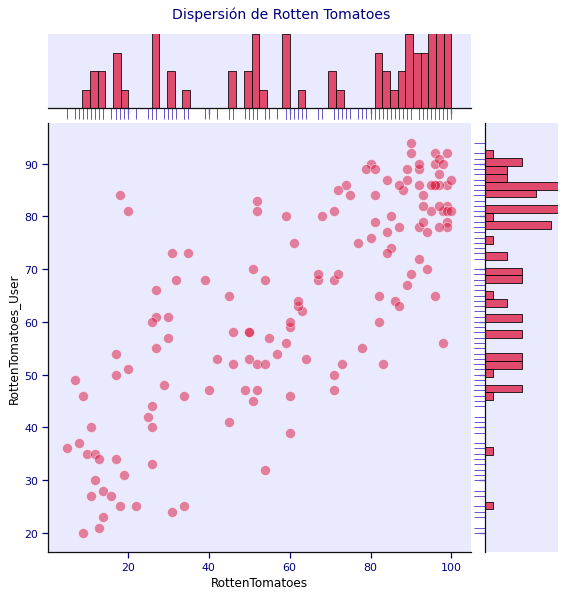

In [17]:
# 1. Dispersión de RT
g = sns.jointplot(x='RottenTomatoes', y='RottenTomatoes_User', data=scores_df, height=8,
                  joint_kws=dict(s=100, legend=None, color='crimson', alpha=0.5),
                  marginal_kws=dict(bins=50, color='crimson'))
g.plot_marginals(sns.rugplot, color="slateblue", height=-.15, clip_on=False)
plt.suptitle('Dispersión de Rotten Tomatoes', y=1.03, fontsize=14)
plt.show()

<font color="orangered">En comparación a la información de fandango, se observa una mayor dispersión de los datos, aunque en este caso la escala de rating es entre 0 a 100.</font>

In [18]:
# 2. Rotten_Diff =  Critics - User Score. 
scores_df['Rotten_Diff'] = scores_df['RottenTomatoes'] - scores_df['RottenTomatoes_User']
scores_df.sample(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
57,Ricki and the Flash (2015),64,53,54,7.0,6.2,37,1769,11
61,American Ultra (2015),46,52,50,6.8,6.5,42,3017,-6
28,Wild Tales (2014),96,92,77,8.8,8.2,107,50285,4
20,"McFarland, USA (2015)",79,89,60,7.2,7.5,59,13769,-10
36,5 Flights Up (2015),52,47,55,6.8,6.1,6,2174,5


In [19]:
# 3. Diferencia media absoluta
scores_df['Rotten_Diff'].abs().mean()

15.095890410958905

<font color="orangered">La diferencia promedio entre la valoración de críticos y usuarios de Rotten tomatoes es de 15.1</font>

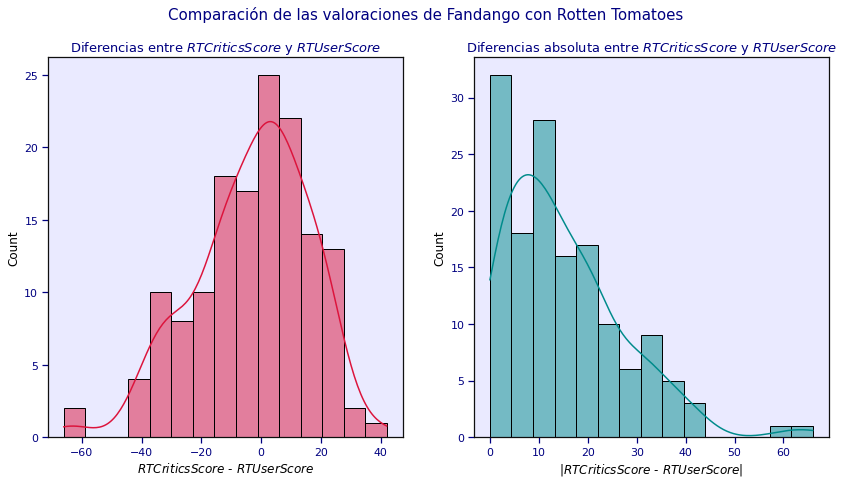

In [20]:
# 4. Visualización de la distribución de las diferencias y del valor absoluto de las diferencias
plt.subplots(1, 2, figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.histplot(scores_df['Rotten_Diff'], kde=True, bins=15)
plt.title('Diferencias entre $RT Critics Score$ y $RT User Score$', fontsize=13)
plt.xlabel('$RT Critics Score$ - $RT User Score$')
plt.subplot(1, 2, 2)
sns.histplot(scores_df['Rotten_Diff'].abs(), kde=True, bins=15, color='darkcyan')
plt.title('\nDiferencias absoluta entre $RT Critics Score$ y $RT User Score$', fontsize=13)
plt.xlabel('$|RT Critics Score$ - $RT User Score|$')

plt.suptitle('Comparación de las valoraciones de Fandango con Rotten Tomatoes', fontsize=15)
plt.show()

<font color="orangered">En el histograma de la izquierda se observa una curva simétrica con centro en 0 (es decir, hay pocas diferencias entre la valoración de los usuarios y críticos). Si observamos la curva de las diferencias en valor absoluto (derecho), vemos que las más altas frecuencia están en diferencias cercanas a cero.</font>

In [21]:
# 5. Películas películas más valoradas por los usuarios que por los críticos
scores_df[scores_df['Rotten_Diff']<0].sort_values('Rotten_Diff')[:10][['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Rotten_Diff']]

,FILM,RottenTomatoes,RottenTomatoes_User,Rotten_Diff
3,Do You Believe? (2015),18,84,-66
85,Little Boy (2015),20,81,-61
134,The Longest Ride (2015),31,73,-42
105,Hitman: Agent 47 (2015),7,49,-42
125,The Wedding Ringer (2015),27,66,-39
132,Max (2015),35,73,-38
19,Pixels (2015),17,54,-37
15,Taken 3 (2015),9,46,-37
51,Entourage (2015),32,68,-36
47,Annie (2014),27,61,-34


<font color="orangered">La película mejor evaluada por los usuarios con mayor diferencia en la puntuación entre usuarios y críticos es Do you believe?</font>

In [22]:
# Películas más valoradas por los críticos que por los usuarios
scores_df[scores_df['Rotten_Diff']>0].sort_values('Rotten_Diff', ascending=False)[:10][['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Rotten_Diff']]

,FILM,RottenTomatoes,RottenTomatoes_User,Rotten_Diff
69,Mr. Turner (2014),98,56,42
112,It Follows (2015),96,65,31
115,While We're Young (2015),83,52,31
145,"Kumiko, The Treasure Hunter (2015)",87,63,24
40,I'll See You In My Dreams (2015),94,70,24
37,Welcome to Me (2015),71,47,24
90,The SpongeBob Movie: Sponge Out of Water (2015),78,55,23
116,Clouds of Sils Maria (2015),89,67,22
7,Top Five (2014),86,64,22
87,Maggie (2015),54,32,22


<font color="orangered">La película mejor evaluada por los críticos con mayor diferencia en la puntuación entre usuarios y críticos es Mr. Turner</font>

<font color='green'>Fin actividad 4</font>

## <font color='green'>**Actividad 5**</font>
## Comparación de las valoraciones de Fandango con MetaCritic

Ahora echemos un vistazo a las calificaciones de __MetaCritic__. Metacritic también muestra una calificación de usuario promedio en comparación con su calificación oficial mostrada.

1. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. De forma similar a la __Actividad 4__ cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para MetaCritic. Calcule esto con `Metacritic - Metacritic_User`

3. Visualice las comparación de diferencias de __RT__ con las de __MetaCritic__.

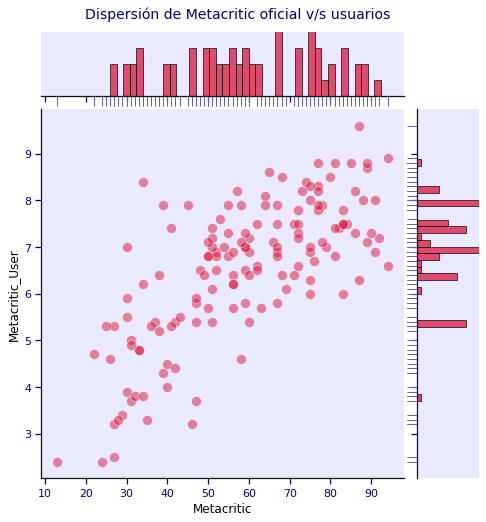

In [23]:
# 1. Visualización de dispersión de crítica oficial versus de usuarios
g = sns.jointplot(x='Metacritic', y='Metacritic_User', data=scores_df, height=7,
                  joint_kws=dict(s=100, legend=None, color='crimson', alpha=0.5),
                  marginal_kws=dict(bins=50, color='crimson'))
g.plot_marginals(sns.rugplot, color="slateblue", height=-.15, clip_on=False)
plt.suptitle('Dispersión de Metacritic oficial v/s usuarios', y=1.03, fontsize=14)

plt.show()


<font color="orangered">Se observa que la calificación entre los usuarios y críticos de metacritic tienen diferentes escalas, siendo la los usuarios entre 0 y 10 y para los críticos entre 0 y 100. Para homologar ambas puntuaciones, la de los usuarios se va a multiplicar por 10.</font>

In [24]:
# 2. Metacritic_Diff =  Criticos - Usuarios 
#Se asume que la calificación del usuario es de 0 a 10, mientras que de Metacritic es de 0 a 100.
#Se cambia la escala de los usuarios de 0 a 100 (multiplicando por 10)

scores_df['Metacritic_Diff'] = scores_df['Metacritic'] - (scores_df['Metacritic_User']*10)
scores_df.sample(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Metacritic_Diff
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42,-15.0
58,Seventh Son (2015),12,35,30,3.9,5.5,126,41177,-23,-9.0
47,Annie (2014),27,61,33,4.8,5.2,108,19222,-34,-15.0
83,Self/less (2015),20,51,34,8.4,6.6,77,5626,-31,-50.0
70,Seymour: An Introduction (2015),100,87,83,6.0,7.7,4,243,13,23.0


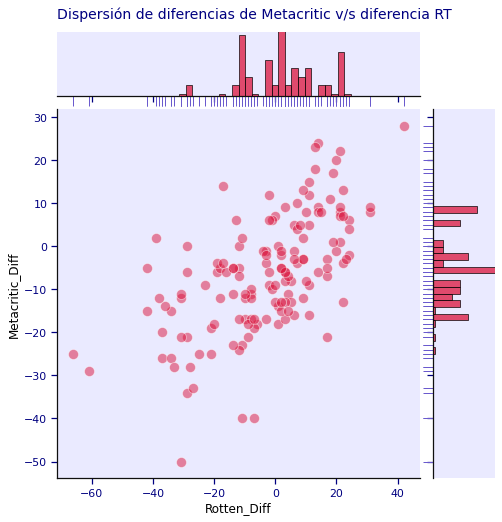

In [25]:
# 3. Dispersión de diferencias

g = sns.jointplot(x='Rotten_Diff', y='Metacritic_Diff', data=scores_df, height=7,
                  joint_kws=dict(s=100, legend=None, color='crimson', alpha=0.5),
                  marginal_kws=dict(bins=50, color='crimson'))
g.plot_marginals(sns.rugplot, color="slateblue", height=-.15, clip_on=False)
plt.suptitle('Dispersión de diferencias de Metacritic v/s diferencia RT', y=1.03, fontsize=14)

plt.show()

<font color="orangered">fg</font>

<font color='green'>Fin actividad 5</font>

## <font color='green'>**Actividad 6**</font>
## Comparación de valoraciones de Fandago vs. All Sites

Explore si Fandango muestra artificialmente calificaciones más altas que las justificadas para impulsar la venta de boletos.

1. Combine ambos datasets (`Fandango` con `All_Sites`). ¿Cuántos registros se pierden en la fusión?
2. Normalice las columnas para que sus escalas sean comparables. Fandango utiliza una escala de $0-5$ para `STARS` y `RATINGS`.
3. Simplifique el DataFrame. Genere una copia con las valoraciones normalizadas. Incluya `STARS`y `RATING` desde Fandango.
4. Compare de la distribución de puntuaciones entre sitios. ¿Fandango muestra calificaciones anormalmente altas? Ya sabemos que su `RATIBG` mostrado es más alto que las valoraciones de usuarios (`STARS`), pero ¿son las calificaciones en sí mismas más altas que el promedio? Analice y comente.
5. Cree una gráfica `hisplot` comparando todas las puntuaciones normalizadas.
6. ¿Cómo se califican las peores películas en todos los sitios? Cree una visualización del tipo `clustermap` de todas las puntuaciones normalizadas. Investigue acerca de esta gráfica avanzada de `Seaborn`.
7. Según las calificaciones de los críticos de __RT__, ¿cuáles son las 10 películas con las calificaciones más bajas? ¿Cuáles son las puntuaciones normalizadas en los otros sitios para estas películas? 

In [37]:
# 1. Merge de ambos datasets
films_df = pd.merge(left=fandango_VOTES_df, right=scores_df, how='inner', on='FILM')
print(f'Se pierden {len(set(fandango_VOTES_df["FILM"]) - set(scores_df["FILM"]))} registros\n')
print("-"*8)
films_df.sample(2)

Se pierden 289 registros

--------


,FILM,STARS,RATING,VOTES,Year,DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Metacritic_Diff
19,Tomorrowland (2015),4.0,3.7,8077,2015,0.3,50,53,60,6.4,6.6,262,42937,-3,-4.0
115,"Two Days, One Night (2014)",3.5,3.5,118,2014,0.0,97,78,89,8.8,7.4,123,24345,19,1.0


In [27]:
# 2. Normalización de las valoraciones
def norm_val(x, xmin=0, xmax=100):
    return round(5*(x - xmin)/(xmax - xmin),1)  #valoración de 0 a 5 estrellas

# 3. Simplificación del DataFrame
columns = ['STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User']
films_Norm_df = films_df.copy()
#films_Norm_df = films_df[:][['FILM', 'Year']]#.drop(['FILM', 'Year'], axis=1)
xmax = [5,5,100,100,100,10]

for i, col in enumerate(columns):
    films_Norm_df[col] = films_df[col].apply(lambda x: norm_val(x, xmin=0, xmax=xmax[i]))

In [28]:
cols = ['FILM','STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User']
films_Norm_df = films_Norm_df[cols]
films_Norm_df.sample(4)

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User
33,Focus (2015),4.0,3.9,2.9,2.7,2.8,3.1
35,The SpongeBob Movie: Sponge Out of Water (2015),3.5,3.3,3.9,2.8,3.1,3.2
16,Magic Mike XXL (2015),4.5,4.4,3.1,3.2,3.0,2.7
48,Top Five (2014),4.0,3.5,4.3,3.2,4.0,3.4


In [29]:
# 4. Comparando distribuciones de valoraciones
films_Norm_df[columns].describe()

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3.033103,3.184138,2.941379,3.255862
std,0.541169,0.502437,1.509049,0.997544,0.979412,0.760927
min,3.000000,2.700000,0.200000,1.000000,0.700000,1.200000
25%,3.500000,3.500000,1.600000,2.500000,2.100000,2.900000
50%,4.000000,3.900000,3.100000,3.300000,3.000000,3.400000
75%,4.500000,4.200000,4.500000,4.000000,3.800000,3.800000
max,5.000000,4.800000,5.000000,4.700000,4.700000,4.800000


<font color="orangered">valoración de STARS es mayor en promedio a valoraciones de usuarios y de las otras plataformas.</font> 

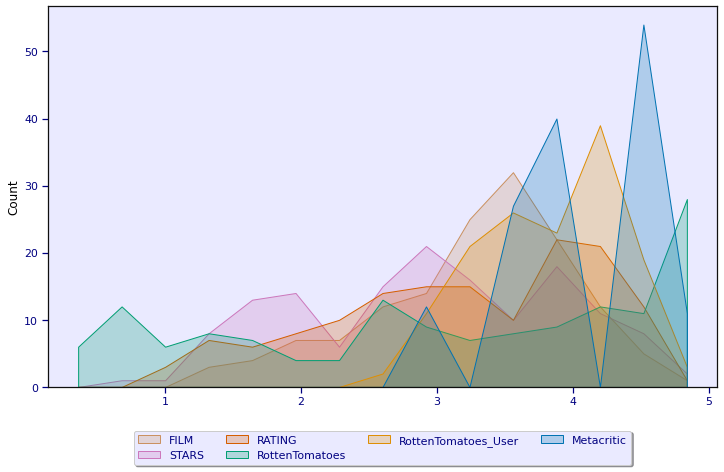

In [38]:
# 5. Hisplot comparando todas las puntuaciones normalizadas.
plt.figure(figsize=(12,7))
sns.histplot(films_Norm_df[1:], bins=15, palette='colorblind' ,element='poly') #color=col_hist[i%2]
leg = films_Norm_df[1:]
#plt.legend(loc='upper left')
plt.legend(labels= leg, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
plt.show()

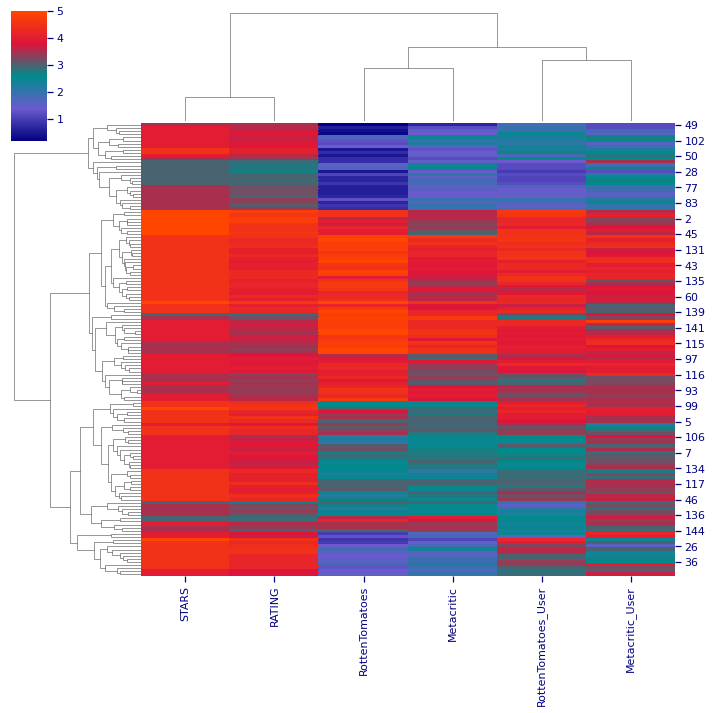

In [32]:
# 6. clustermap
g = sns.clustermap(films_Norm_df[cols[1:]],
                   cmap=mcolors.LinearSegmentedColormap.from_list("", ['navy', 'slateblue', 'darkcyan', 'crimson', 'orangered']))


<font color="orangered">El dendograma de la parte superior indica que hay dos clusters, uno para la valoración tanto de usuarios como de la plataforma de fandango, mientras que el otro cluster es de las clasificaciones de las otras plataformas.</font>

<font color="orangered">Observando los colores de la gráfica, las puntuaciones de fandango son mayores a las de las otras plataformas.</font>

In [33]:
# 7. Examinemos las 10 peores películas de RT (críticos).
films_Norm_df.sort_values('RottenTomatoes')[['FILM', 'RottenTomatoes','Metacritic','STARS']][:10]

,FILM,RottenTomatoes,Metacritic,STARS
49,Paul Blart: Mall Cop 2 (2015),0.2,0.7,3.5
84,Hitman: Agent 47 (2015),0.3,1.4,4.0
54,Hot Pursuit (2015),0.4,1.6,4.0
25,Taken 3 (2015),0.5,1.3,4.5
28,Fantastic Four (2015),0.5,1.4,3.0
50,The Boy Next Door (2015),0.5,1.5,4.0
88,The Loft (2015),0.6,1.2,4.0
87,Unfinished Business (2015),0.6,1.6,3.5
78,Mortdecai (2015),0.6,1.4,3.5
77,Seventh Son (2015),0.6,1.5,3.5


<font color="orangered">Para estas peliculas, Metacritic y Fandango tienen una valoración mayor a Rotten Tomatoes, aunque la puntuación de fandango es muy superior a las otras plataformas.</font> 

<font color='green'>Fin actividad 6</font>

### Comentarios adicionales:

Al revisar la corerlación entre las distincas calificaciones tenemos algunas relaciones 'cuestionables':

- Si asumimos que el criterio de los críticos (especialistas) tienen una base en común, ya que ellos evalúan aspectos técnicos, a nivel global deberían presentar una correlación alta. Esto es así para *Rotten Tomatoes* y *Metacritic*, pero en el caso de *Fandango* es extremadamente baja, por lo que es relevante hacerse la pregunta de porqué la opinión de los críticos de *Fandango* difiere tanto de los de *Rotten Tomatoes* y *Metacritic*?.
- Otra premisa que podemos asumir es dado que los usuarios que evalúan tienen gustos y criterios dispares (no hay motivo para un criterio común) la correlación con la opinión de los críticos no debería ser extremadamente alta. Esto no se aprecia en el caso de *Fandango*, lo que da a entender que el criterio de los críticos de *Fandango* es similar a los de sus usuarios?.

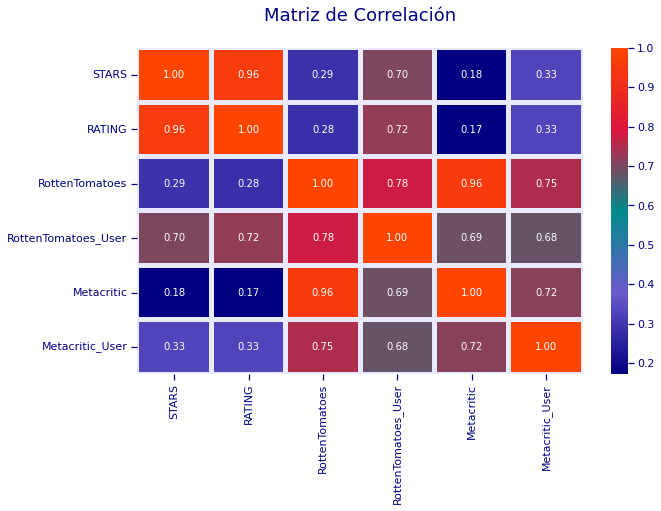

In [34]:
corr  = films_Norm_df[columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, linewidths=4, linecolor='#eaeaff', fmt='.2f',
            cmap=mcolors.LinearSegmentedColormap.from_list("", ['navy', 'slateblue', 'darkcyan', 'crimson', 'orangered']))
plt.title('Matriz de Correlación' + '\n', fontsize=18)
plt.show()

<font color="orangered">En el caso de los expertos, se observa que la puntuación de fandango tiene una correlación baja en comparación a sus pares (0.29 y 0.18), mientras que la correlación entre RT y Metacritic es de 0.96.</font>

<font color="orangered">En relación a los usuarios y los expertos en cada plataforma, observamos que fandango tienen una correlación de 0.96, mientras que para RT es de 0.78 y de Metacritic de 0.72; siendo la correlación de fandango muy sospechosa.</font>

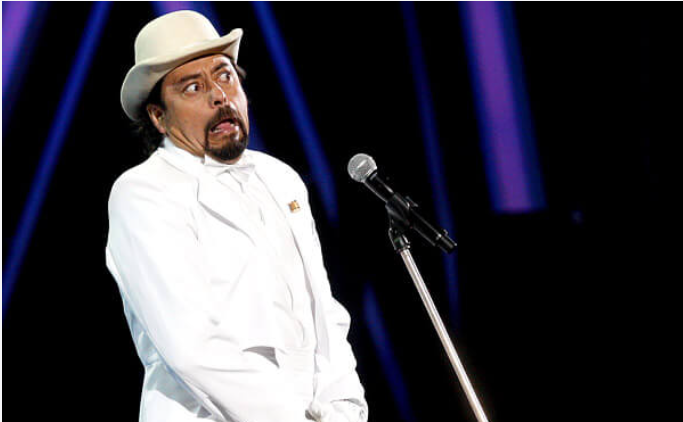